# Logistic Regression

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [78]:
train = pd.read_csv('titanic_train.csv')

In [79]:
test = pd.read_csv('titanic_test.csv')

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### `train.isnull()` : return True if the cell is null

In [83]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

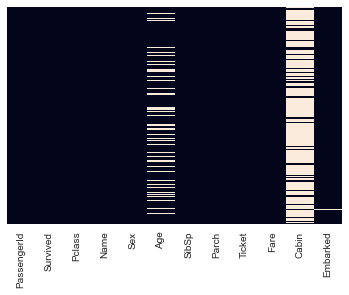

In [84]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [85]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

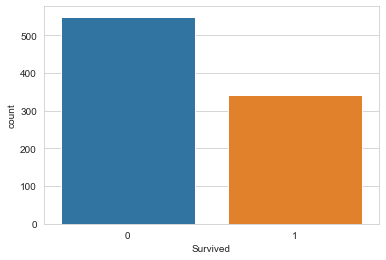

In [86]:
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

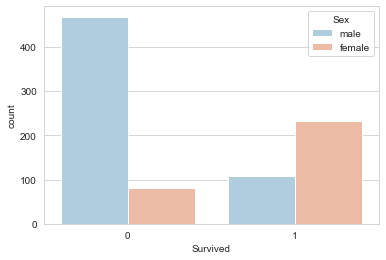

In [87]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

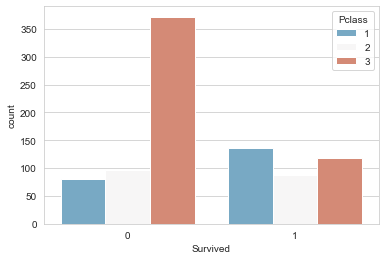

In [88]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='RdBu_r')

C:\Users\slaki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

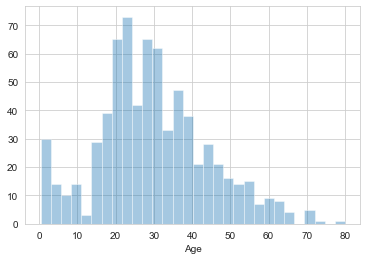

In [89]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

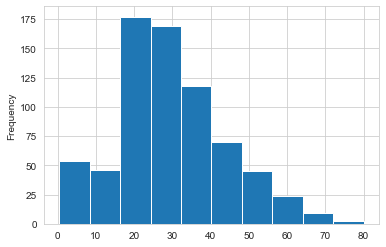

In [90]:
train['Age'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

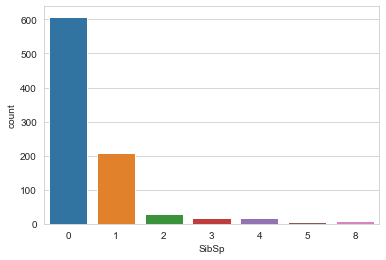

In [91]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

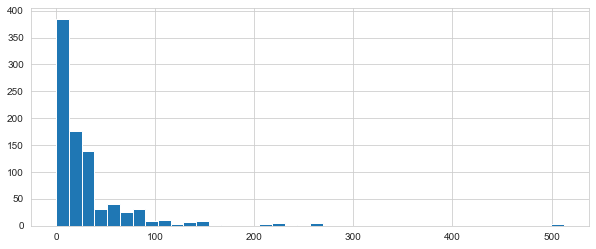

In [92]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [93]:
import cufflinks as cf 
cf.go_offline()

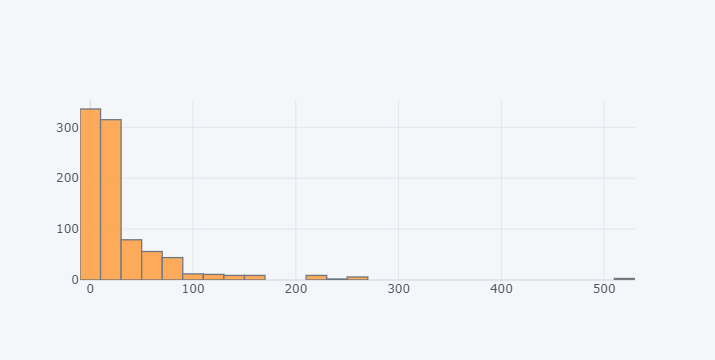

In [94]:
train['Fare'].iplot(kind='hist', bins=40)

# Logistic Regression Part 2

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

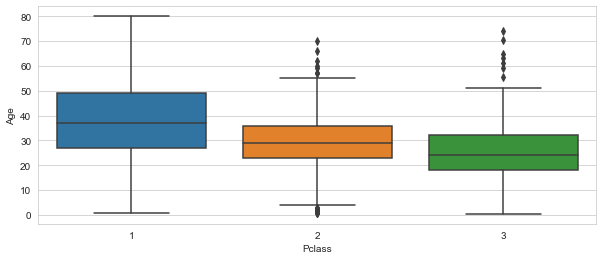

In [95]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass', y='Age', data=train)

In [96]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1: 
            return 3
        elif Pclass == 2: 
            return 29
        else: 
            return 24
    
    else:
        return Age

In [97]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

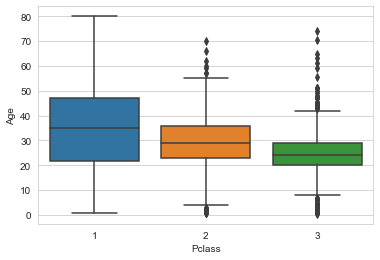

In [98]:
sns.boxplot(x='Pclass', y='Age', data=train)

<AxesSubplot:>

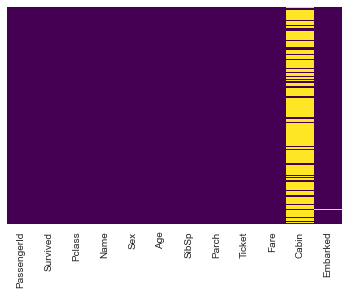

In [99]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [100]:
train.drop('Cabin', axis=1, inplace=True)

In [101]:
train.dropna(axis=0, inplace=True)

<AxesSubplot:>

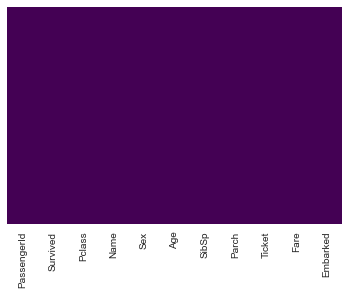

In [102]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### `pd.get_dummies(train['Sex'])` : create multiple columns for a categorical variable
*`drop_first` : 'true' / deletes the first row to avoid multi colinearity

In [108]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [107]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [109]:
train = pd.concat([train, sex, embark], axis=1)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [111]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)

In [113]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [114]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [115]:
train.drop('PassengerId', axis=1, inplace=True)

In [116]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Part.3

In [117]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [120]:
from sklearn.linear_model import LogisticRegression

In [142]:
logmodel = LogisticRegression()

In [143]:
logmodel.max_iter = 1000

In [126]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [127]:
logmodel.coef_

array([[-8.98789559e-01, -2.36267651e-02, -1.99773934e-01,
        -7.41477890e-02,  2.11787310e-03, -2.49140563e+00,
        -1.29485219e-01, -3.36645727e-01]])

In [128]:
logmodel.intercept_

array([3.98746692])

In [140]:
predictions = logmodel.predict(X_test)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       163
           1       0.79      0.67      0.73       104

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [134]:
confusion_matrix(y_test, predictions)

array([[144,  19],
       [ 34,  70]], dtype=int64)

In [139]:
print(f"Precision for 0: {144/(144+34)}")

Precision for 0: 0.8089887640449438


In [138]:
print(f"Precision for 1 : {70/(19+70)}")

Precision for 1 : 0.7865168539325843
